## Random Forest

In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

## Data preparation

In [2]:
train = pd.read_excel('IBM_train.xlsx')
test = pd.read_excel('IBM_test.xlsx')

train.set_index('Date', inplace=True)
test.set_index('Date', inplace=True)

train = train.fillna(1)
test = test.fillna(1)

test['direction'] = np.sign(test['Log_Returns']).astype(int)
train['direction'] = np.sign(train['Log_Returns']).astype(int)

count = 0
for i in train['direction']:
    if i == 0:
        train['direction'].iloc[count] = 1
    count += 1

count = 0
for i in test['direction']:
    if i == 0:
        test['direction'].iloc[count] = 1
    count += 1

X_train = train.drop(['Log_Returns','TwoBinaryFeatures_log_reg','TwoBinaryFeatures_gauss_nb','FiveBinaryFeatures_log_reg','FiveBinaryFeatures_svm','FiveDigitizedFeatures_log_reg','direction'], axis=1)
y_train = train['direction']

X_test = test.drop(['AdjClose','Log_Returns','TwoBinaryFeatures_log_reg','TwoBinaryFeatures_gauss_nb','FiveBinaryFeatures_log_reg','FiveBinaryFeatures_svm','FiveDigitizedFeatures_log_reg','direction'], axis=1)
y_test = test['direction']

c:\Users\cosim\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Model

In [3]:
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

RandomForestClassifier()

In [4]:
y_train.value_counts()

 1    1964
-1    1900
Name: direction, dtype: int64

In [5]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print('accuracy train: ',accuracy_score(y_train,y_pred_train))
print('accuracy test: ',accuracy_score(y_test,y_pred_test))
print('loss train', log_loss(y_train,y_pred_train))
print('loss test: ',log_loss(y_test,y_pred_test))

accuracy train:  0.8566252587991718
accuracy test:  0.7986698911729141
loss train 4.952039860801777
loss test:  6.95375120508448


In [6]:
train['final_strategy'] = y_pred_train
test['final_strategy'] = y_pred_test

train['forest_returns'] = train['final_strategy']*train['Log_Returns']

strat = train[['Log_Returns', 'forest_returns']].sum().apply(np.exp)
strat

Log_Returns       2.094930e+00
forest_returns    6.235281e+16
dtype: float64

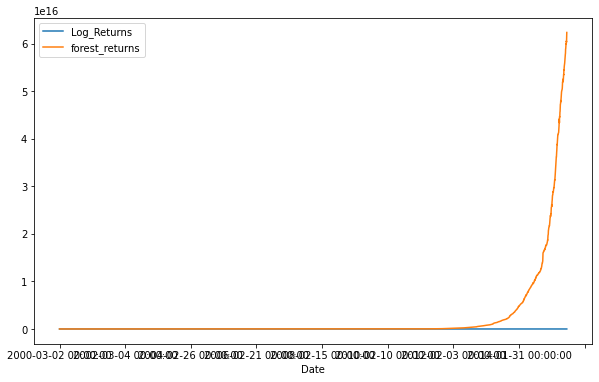

In [7]:
train[['Log_Returns', 'forest_returns']].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [8]:
test['forest_returns'] = test['final_strategy']*test['Log_Returns']
test['AdjClose_pct'] = test['AdjClose'].pct_change()
test['strat_pct'] = test['AdjClose_pct']*test['final_strategy']
strat = test[['AdjClose_pct', 'strat_pct']].sum()
strat

AdjClose_pct     0.360670
strat_pct       12.879777
dtype: float64

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.]),
 [Text(-250.0, 0, '18-02-2021'),
  Text(0.0, 0, '22-07-2015'),
  Text(250.0, 0, '19-07-2016'),
  Text(500.0, 0, '17-07-2017'),
  Text(750.0, 0, '13-07-2018'),
  Text(1000.0, 0, '12-07-2019'),
  Text(1250.0, 0, '09-07-2020'),
  Text(1500.0, 0, '07-07-2021'),
  Text(1750.0, 0, '')])

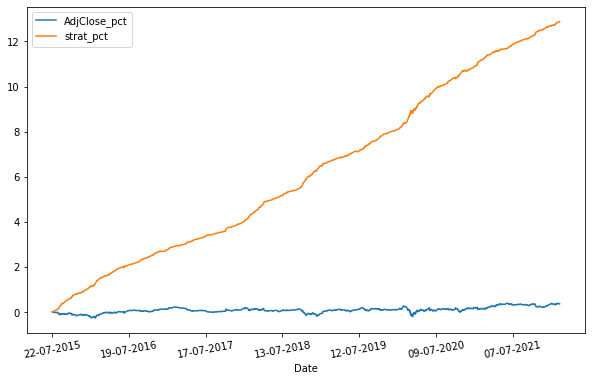

In [9]:
import matplotlib.pyplot as plt
test['AdjClose_pct'] = test['AdjClose'].pct_change()
test['strat_pct'] = test['AdjClose_pct']*test['final_strategy']
test.index = pd.to_datetime(test.index).strftime('%d-%m-%Y')
test[['AdjClose_pct', 'strat_pct']].cumsum().plot(figsize=(10, 6));
plt.xticks(rotation=10)